In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Q7.Using numpy functions, transpose and multiply the following arrays
#a=np.arange(4).reshape(2,2)
#b=np.arange(6).reshape(3,2) 

a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
print(a.transpose())
print(b.transpose())
a=np.arange(4).reshape(2,2)
b=np.arange(6).reshape(3,2) 
#a_new=a.flatten()
#a_new
#b
#mul = b*np.transpose(np.array([a_new,]*1)
b*np.expand_dims(a,1)

In [ ]:
#8.Write a Python program to create an array of 5 integers and display the array items in reverse order
import numpy as np
arr=np.array([1,2,3,4])
arr
arr1=list(reversed(arr))
arr1

In [ ]:
#Q9.What was the average grade for all students in the final exam vs both midterms
import openpyxl
import pprint
#wb=openpyxl.load_workbook("Exam Stress Final.xlsx")
file= pd.read_excel("Exam Stress Final.xlsx",sheet_name='Grades')
file
#sheet= wb.get_sheet_by_name('Grades')
print(file['final'].mean())
print(file['Midterm 1'].mean())
print(file['Midterm 2'].mean())

In [ ]:
#Q10.Which students basal body temperature was highest during the second part of the exam?
file= pd.read_excel("Exam Stress Final.xlsx",sheet_name='Temp')
file
file_mid2= file.query('Exam=="Midterm 2"')
file_mid2
file['TEMP'].idxmax()

#file.set_index('Student_id',inplace=True)
#result=file.loc['921']
#result


In [3]:
#Q.65 Generate a 3x3  Array using Random values between 1to 9  and Fix the values and position  in Next Run.

arr = np.array([[1,2,3],[7,8,9],[4,5,6]])
print(arr)
my_iter = iter (arr)
print("First Row:",next(my_iter))
print("Second Row:",next(my_iter))
print("Third Row:",next(my_iter))

[[1 2 3]
 [7 8 9]
 [4 5 6]]
First Row: [1 2 3]
Second Row: [7 8 9]
Third Row: [4 5 6]


In [4]:
#Q.66 find the way to reverse string for given input 

str1 = str(input("Enter a Sentence"))
s = str1.split()[::-1]
r= []
for i in s:
    r.append(i)
print(" ".join(r))

Enter a SentenceI Love to Learn Python
Python Learn to Love I


In [7]:
#Q.69 Input any string from user, Convert that into a tuple and then find the lenghth of that tuple

str2 = input("Enter a sentence ")
t = tuple(str2)
#print(t)
length = len (t)
print(length)

Enter a sentence I Love to Learn Python
22


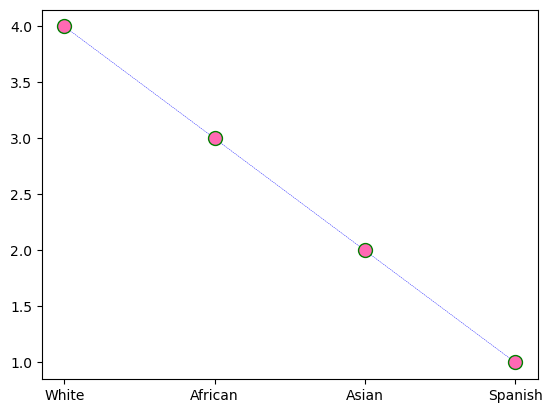

In [13]:
#Q.71 Creat the visualisation to count the student based on race

df1 = pd.read_excel("Exam Stress Final.xlsx","Demography")
df1[["Student_id","Race"]]
count_of_students = df1['Race'].value_counts()
#print(count_of_students)
plt.plot(count_of_students, ls = '--', color = 'b', linewidth = '0.3', marker = 'o', ms = 10, mec = 'g', mfc = 'hotpink')
plt.show()

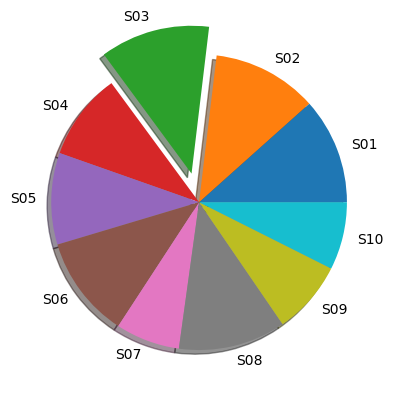

In [14]:
#Q.74 Create a Pie chart for  Grades and explode the wedge with Highest Grade in Final and Label with the Student ID

Grades_df = pd.read_excel("Exam Stress Final.xlsx","Grades")
Grades_df
Final_Grades = Grades_df["final"]
Final_Grades
Student = Grades_df["Student_id"]
#print(Student)
my_labels = Student
my_explode = [0,0,0.2,0,0,0,0,0,0,0]
plt.pie(Final_Grades, labels=my_labels, explode = my_explode, shadow = 'True')
#plt.legend(title = "Analysis of Students with Grades in Final Exam")
plt.show()